# Captsone project for the IBM Data Science Professional Certificate 

(https://www.coursera.org/professional-certificates/ibm-data-science?#courses)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Hello, Capstone Project Course!")

In [ ]:
!conda install -c anaconda seaborn -y
import seaborn as sb
print("Seaborn installed successfully!")

In [ ]:
# The code was removed by Watson Studio for sharing.

## 2. Data Acquisition and Cleaning

In [ ]:
# drop the column of PEDROWNOTGRNT due to missing 97.6% of values and drop SPEEDING due to too many missing values.
# drop INTKEY, INATTENTIONIND, and STATUS due to irrelevance.
dfw = df.drop(['PEDROWNOTGRNT', 'INTKEY', 'INATTENTIONIND', 'SPEEDING', 'STATUS'], axis = 1)
# drop the rows containing NaN values for the following columns.
dfw.dropna(subset=['X', 'Y', 'ADDRTYPE', 'LOCATION', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ST_COLDESC', 'SDOTCOLNUM'], axis = 0, inplace = True)
# drop EXCEPTRSNCODE and EXCEPTRSNDESC columns as missing 96.46% and 99.99% of values respectively
dfw.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC'], axis = 1, inplace = True)
dfw.columns

In [ ]:
# create a new dataframe on which to run the models
dfm = dfw.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'LOCATION', 'SEVERITYDESC', 'INCDATE', 'INCDTTM', 'SDOTCOLNUM', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR', 'ST_COLCODE', 'ST_COLDESC', 'SDOT_COLDESC', 'SDOT_COLCODE', 'ADDRTYPE', 'UNDERINFL'], axis = 1)

In [ ]:
# drop the pesky X and Y columns... Finally
dfm.drop(['X', 'Y'], axis = 1, inplace = True)
# drop the duplicate SEVERITYCODE column named SEVERITYCODE.1
dfm.drop(['SEVERITYCODE.1'], axis = 1, inplace = True)
dfm.shape

In [ ]:
# filter out the rows in which there are more than 10 persons.
dfm1 = dfm[dfm['PERSONCOUNT'] < 11]
dfm1.shape

In [ ]:
# filter out the rows in which there are more than 3 pedestrians. 
dfm2 = dfm1[dfm1['PEDCOUNT'] < 4]
dfm2.shape

In [ ]:
dfm2.groupby(['PERSONCOUNT', 'SEVERITYCODE'])['SEVERITYCODE'].count()

In [ ]:
dfm2.columns

In [ ]:
dfm2.isnull().sum()

In [ ]:
dfm2.head()

## 3. Exploratory Data Analysis

In [ ]:
# 3.2 plot severity vs lighting conditions
indvar = 'LIGHTCOND'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title('Lighting Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Lighting Conditions', fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.3 plot severity vs weather conditions
indvar = 'WEATHER'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title('Weather Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Weather Conditions', fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.4 plot severity vs road conditions
indvar = 'ROADCOND'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title('Road Conditions vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel('Road Conditions', fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.5 plot severity vs collision type
indvar = 'COLLISIONTYPE'
depvar = 'Collision Type'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.6 plot severity vs junction type
indvar = 'JUNCTIONTYPE'
depvar = 'Junction Type'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.7 plot severity vs number of people 
indvar = 'VEHCOUNT'
depvar = 'Number of Vehicles'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.8 plot severity vs number of people 
indvar = 'PERSONCOUNT'
depvar = 'Number of People'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.9 plot severity vs number of pedestrians
indvar = 'PEDCOUNT'
depvar = 'Number of Pedestrians'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
# 3.10 plot severity vs number of cyclists
indvar = 'PEDCYLCOUNT'
depvar = 'Number of Cyclists'

# prepare the data to be plotted
dflc = (dfm2
    .groupby([indvar, 'SEVERITYCODE'])
    .size()
    .reset_index()
    .replace({'SEVERITYCODE': {1:"prop. damage", 2:"minor injury"}})
    .rename(columns={0:"count"}))

# calculate survival % per town of embarkation    
dflc["percent"] = (dflc
                 .groupby(indvar)
                 .apply(lambda x: x["count"] / x["count"].sum()).values)

# sort the dataframe to match the drawing order    
dflc.sort_values(by=['SEVERITYCODE', indvar], inplace = True)

# plot severity vs lighting conditions
plt.style.use('ggplot')
fig = sb.catplot(
    x="count", y=indvar, hue='SEVERITYCODE',
    kind="bar", data=dflc, height=10, aspect=2, legend_out = False)

for i, bar in enumerate(fig.ax.patches):
   
    height = bar.get_height()
    fig.ax.annotate(
        # reference the pre-calculated row in the dataframe
        f"{dflc.iloc[i, 3] :.0%}",
        xycoords="data",
        xytext=(30, -15),
        fontsize = 18,
        textcoords="offset points",
        xy=(bar.get_width(), bar.get_y()),
        ha='center', va='center')
    
# make space for annonations
plt.margins(x=0.2)

# make final adjustments
plt.title(depvar + ' vs. Number of Collisions by Severity', fontsize = 30)
plt.xlabel('Number of Collisions', fontsize = 24)
plt.ylabel(depvar, fontsize = 24)
plt.tick_params(labelsize=18)
plt.legend(fontsize = 18, title = "Severity", loc = 'lower right', title_fontsize = 18, shadow = True)
plt.show()

In [ ]:
dfm2.dtypes
dfm2.columns

## 4. Predictive Modeling

### 4.1 Data Wrangling

In [ ]:
# Converting categorical variables to quantitative variables
dummy_collisiontype = pd.get_dummies(dfm2["COLLISIONTYPE"])
dummy_junctiontype  = pd.get_dummies(dfm2["JUNCTIONTYPE"])
dummy_weather = pd.get_dummies(dfm2["WEATHER"])
dummy_roadcond = pd.get_dummies(dfm2["ROADCOND"])
dummy_lightcond = pd.get_dummies(dfm2["LIGHTCOND"])

In [ ]:
# merging data from dummies into the dataframe
dfm3 = pd.concat([dfm2, dummy_collisiontype], axis = 1)
dfm3 = pd.concat([dfm3, dummy_junctiontype], axis = 1)
dfm3 = pd.concat([dfm3, dummy_weather], axis = 1)
dfm3 = pd.concat([dfm3, dummy_roadcond], axis = 1)
dfm3 = pd.concat([dfm3, dummy_lightcond], axis = 1)

In [ ]:
# dropping original categorical variable columns
dfm3.drop("COLLISIONTYPE", axis = 1, inplace = True)
dfm3.drop("JUNCTIONTYPE", axis = 1, inplace = True)
dfm3.drop("WEATHER", axis = 1, inplace = True)
dfm3.drop("ROADCOND", axis = 1, inplace = True)
dfm3.drop("LIGHTCOND", axis = 1, inplace = True)

dfm3.shape

In [ ]:
dfm3.columns

In [ ]:
# convert all columns to uppercase for consistency
dfm3.columns = map(str.upper, dfm3.columns)
dfm3.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [ ]:
Z = dfm3[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'ANGLES', 'CYCLES', 'HEAD ON', 'LEFT TURN', 'PARKED CAR',
       'PEDESTRIAN', 'REAR ENDED', 'RIGHT TURN', 'SIDESWIPE',
       'AT INTERSECTION (BUT NOT RELATED TO INTERSECTION)',
       'AT INTERSECTION (INTERSECTION RELATED)', 'DRIVEWAY JUNCTION',
       'MID-BLOCK (BUT INTERSECTION RELATED)',
       'MID-BLOCK (NOT RELATED TO INTERSECTION)', 'RAMP JUNCTION',
       'BLOWING SAND/DIRT', 'CLEAR', 'FOG/SMOG/SMOKE', 'OVERCAST',
       'RAINING', 'SEVERE CROSSWIND', 'SLEET/HAIL/FREEZING RAIN', 'SNOWING',
       'UNKNOWN', 'DRY', 'ICE', 'OIL', 'SAND/MUD/DIRT', 'SNOW/SLUSH',
       'STANDING WATER', 'WET', 'DARK - NO STREET LIGHTS',
       'DARK - STREET LIGHTS OFF', 'DARK - STREET LIGHTS ON', 'DAWN',
       'DAYLIGHT', 'DUSK']]
Y = dfm3[['SEVERITYCODE']]

### 4.3 Classification Models

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [ ]:
# define function to plot a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
Zcm = preprocessing.StandardScaler().fit(Z).transform(Z.astype(float))
Zcm[0:5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Zcm, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
!conda install -c conda-forge pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [ ]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(Zcm, Y, test_size=0.3, random_state=3)
collisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
collisionTree.fit(X_trainDT, y_trainDT)
predTree = collisionTree.predict(X_testDT)
yhat_probDT = collisionTree.predict_proba(X_testDT)
print("Decision's Tree Accuracy: ", metrics.accuracy_score(y_testDT, predTree))

In [ ]:
dot_data = StringIO()
filename = "collisiontree.png"
featureNames = Z[0:43]
targetNames = dfm3["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(collisionTree, feature_names = featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [ ]:
print(f1_score(y_testDT, predTree, average='weighted')) 
print(jaccard_similarity_score(y_testDT, predTree))
print(log_loss(y_testDT, yhat_probDT))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testDT, predTree, labels=[2,1]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testDT, predTree, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=2','severity=1'],normalize= False,  title='Confusion matrix')

#### Logistic Regression

In [46]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss

In [ ]:
X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(Zcm, Y, test_size=0.2, random_state=4)
print ('Train set:', X_trainLR.shape,  y_trainLR.shape)
print ('Test set:', X_testLR.shape,  y_testLR.shape)

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainLR, y_trainLR.values.ravel())

In [ ]:
yhatLR = LR.predict(X_testLR)

In [ ]:
yhat_probLR = LR.predict_proba(X_testLR)

In [ ]:
jaccard_similarity_score(y_testLR, yhatLR)

In [ ]:
print(confusion_matrix(y_testLR, yhatLR, labels=[2,1]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testLR, yhatLR, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=2','severity=1'],normalize= False,  title='Confusion matrix')

In [ ]:
print(f1_score(y_testLR, yhatLR, average='weighted')) 
print(jaccard_similarity_score(y_testLR, yhatLR))
print(log_loss(y_testLR, yhat_probLR))

#### Support Vector Machine

In [60]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [61]:
X_trainSVM, X_testSVM, y_trainSVM, y_testSVM = train_test_split(Zcm, Y, test_size=0.2, random_state=4)
print ('Train set:', X_trainSVM.shape,  y_trainSVM.shape)
print ('Test set:', X_testSVM.shape,  y_testSVM.shape)

Train set: (87408, 43) (87408, 1)
Test set: (21852, 43) (21852, 1)


In [63]:
clf = svm.SVC(kernel='rbf', probability = True)
clf.fit(X_trainSVM, y_trainSVM.values.ravel()) 

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [64]:
yhatSVM = clf.predict(X_testSVM)

In [68]:
yhat_probSVM = clf.predict_proba(X_testSVM)

In [ ]:
print(f1_score(y_testSVM, yhatSVM, average='weighted')) 
print(jaccard_similarity_score(y_testSVM, yhatSVM))
print(log_loss(y_testSVM, yhat_probSVM))

In [ ]:
print(confusion_matrix(y_testSVM, yhatSVM, labels=[2,1]))

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testSVM, yhatSVM, labels=[2,1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=2','severity=1'],normalize= False,  title='Confusion matrix')

#### ROC Curves

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [70]:
yhat_probsDT = yhat_probDT[:, 1]
yhat_probsLR = yhat_probLR[:, 1]
yhat_probsSVM = yhat_probSVM[:, 1]
print(yhat_probsDT)
print(yhat_probsLR)
print(yhat_probsSVM)

[0.37 0.37 0.09 ... 0.37 0.01 0.37]
[0.35 0.35 0.49 ... 0.16 0.41 0.3 ]
[0.23 0.23 0.45 ... 0.24 0.25 0.23]


In [71]:
aucDT = roc_auc_score(y_testDT, yhat_probsDT)
aucLR = roc_auc_score(y_testLR, yhat_probsLR)
aucSVM = roc_auc_score(y_testSVM, yhat_probsSVM)
print('AUC: %.2f' % aucDT)
print('AUC: %.2f' % aucLR)
print('AUC: %.2f' % aucSVM)

AUC: 0.74
AUC: 0.79
AUC: 0.70


In [72]:
fprDT, tprDT, thresholdsDT = roc_curve(y_testDT, yhat_probsDT, pos_label = 2)
fprLR, tprLR, thresholdsLR = roc_curve(y_testLR, yhat_probsLR, pos_label = 2)
fprSVM, tprSVM, thresholdsSVM = roc_curve(y_testSVM, yhat_probsSVM, pos_label = 2)

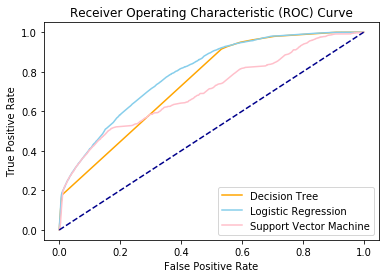

In [73]:
# Set colors to those that support color deficient people
plt.plot(fprDT, tprDT, color='orange', label='Decision Tree')
plt.plot(fprLR, tprLR, color='#87ceeb', label='Logistic Regression')
plt.plot(fprSVM, tprSVM, color='pink', label='Support Vector Machine')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()